In [1]:
# imports

import pandas as pd
import os
import geopandas as gpd 
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from geopy.geocoders import Nominatim
from shapely.geometry import Point

In [14]:
## Read in shape file

shape_file_path = "LSOA_2011_EW_BGC_V3/LSOA_2011_EW_BGC_V3.shp"
img_directory = "croydon_heatmaps"
if not os.path.exists(img_directory):
    os.makedirs(img_directory)

def read_shape_file(shape_file_path):
    boundaries = gpd.read_file(shape_file_path)
    return boundaries

boundaries = read_shape_file(shape_file_path)
boundaries.head()

,LSOA11CD,LSOA11NM,LSOA11NMW,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
0,E01000001,City of London 001A,City of London 001A,532129,181625,-0.097060,51.5181,283b0ead-f8fc-40b6-9a79-1ddd7e5c0758,"POLYGON ((532105.092 182011.230, 532162.491 18..."
1,E01000002,City of London 001B,City of London 001B,532480,181699,-0.091970,51.5187,ddce266b-7825-428c-9e0a-df66b0179a55,"POLYGON ((532634.497 181926.016, 532619.141 18..."
2,E01000003,City of London 001C,City of London 001C,532245,182036,-0.095230,51.5218,c45e358e-a794-485a-bf76-d96e5d458ea4,"POLYGON ((532135.138 182198.131, 532158.250 18..."
3,E01000005,City of London 001E,City of London 001E,533581,181265,-0.076280,51.5145,4ddaf5e4-e47f-4312-89a0-923ffec028a6,"POLYGON ((533808.018 180767.774, 533649.037 18..."
4,E01000006,Barking and Dagenham 016A,Barking and Dagenham 016A,544994,184276,0.089318,51.5388,1c04702a-b662-4cfc-aab9-2c3e0f2d5e29,"POLYGON ((545122.049 184314.931, 545271.849 18..."


In [15]:
## Read in data to be plotted

# enter name of excel file containing data you want to map, including file extension, in quotations here
data_file_path = "IMD.xlsx"
sheet_name = 'IoD2019 Scores'


def read_data_file(data_file_path, sheet_name):
    file_extension = os.path.splitext(data_file_path)[1]
    if file_extension == '.xlsx':
        data = pd.read_excel(data_file_path, sheet_name=sheet_name)
    elif file_extension == '.csv':
        data = pd.read_csv(data_file_path)
    return data

In [16]:
## Merging boundaries data and plot data

# Enter the mutual/shared column in the boundaries dataset and the data you want to plot below - this is the key used 
# to join the two datasets together
boundaries_merge_key = 'LSOA11CD'
data_merge_key = 'LSOA code (2011)'

def merge_datasets(boundaries, boundaries_merge_key, data, data_merge_key):
    merged_dataset = boundaries.merge(data, how='inner', left_on=boundaries_merge_key, right_on=data_merge_key)
    return merged_dataset

In [17]:
## Filtering to area of focus

# Enter the name of the column in your shpae file (see above) that you want to filter by and the value you want to filter for
filter_column = 'Local Authority District name (2019)'
filter_value = 'Croydon'

def filter_merged_data(merged_dataset, filter_column, filter_value):
    plot_dataset = merged_dataset[merged_dataset[filter_column] == filter_value]
    plot_dataset = plot_dataset.to_crs('EPSG:4326')
    return plot_dataset

In [19]:
## Plotting the data

# Type the name of the column of data ou want to map
plot_variable = 'Index of Multiple Deprivation (IMD) Score'

# Name the file you want to save the mapped visual to be saved as



def plot_data(shape_file_path, 
              data_file_path, 
              sheet_name, 
              boundaries_merge_key, 
              data_merge_key, 
              filter_column, 
              filter_value, 
              plot_variable, 
              map_file_name,
              plot_title
             ):
    
    boundaries = read_shape_file(shape_file_path)
    data = read_data_file(data_file_path, sheet_name)
    merged_dataset = merge_datasets(boundaries, boundaries_merge_key, data, data_merge_key)
    plot_dataset = filter_merged_data(merged_dataset, filter_column, filter_value)
    
    fig = plt.figure(figsize=(20,20), dpi=100)
    ax = fig.add_subplot(111)
    ax.set_axis_off()
    ax.set_facecolor("white")
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.0)
    
    plot_dataset.plot(column=plot_variable, 
                      ax=ax, cax=cax, 
                      legend=True, 
                      legend_kwds={"label": "Index of Multiple Deprivation"},
                      cmap='Reds')
    ax.title.set_text(plot_title)
    ax.title.set_size(16)
    
    fig.savefig(map_file_name)
    return fig, ax, plot_dataset

/Users/franciscomacedo/dev/sf/heatmaps/.venv/lib/python3.11/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


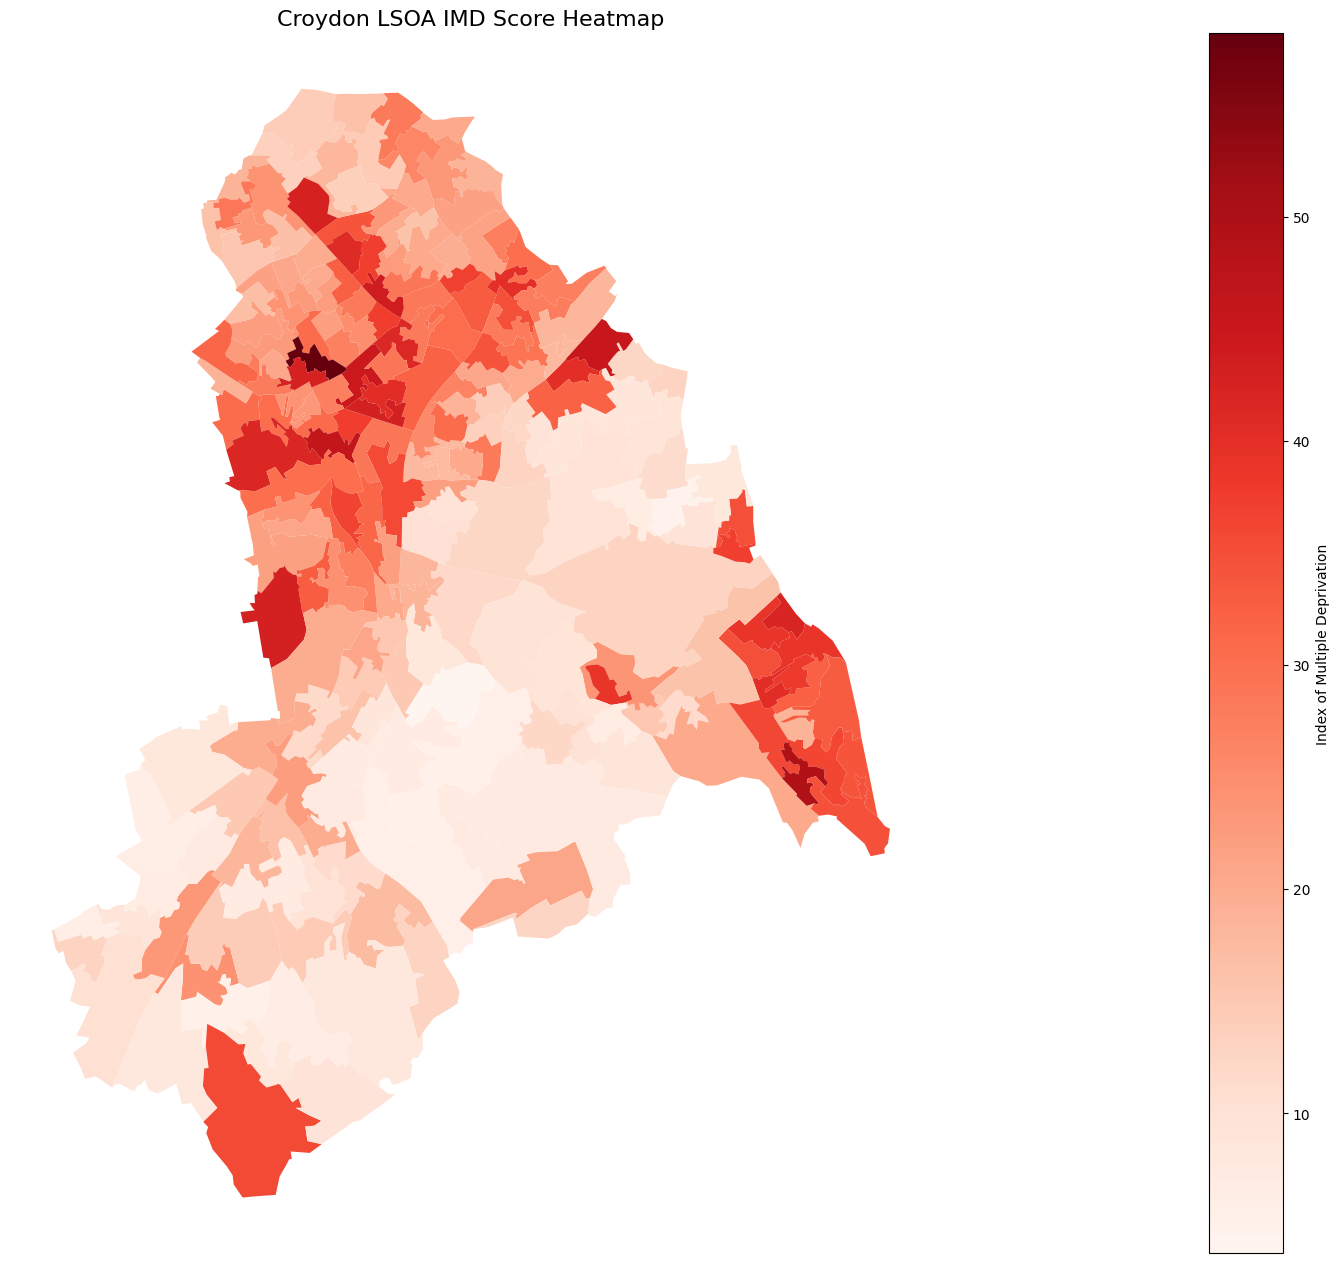

In [20]:
# IMD map - no postcodes

sheet_name = 'IoD2019 Scores'
boundaries_merge_key = 'LSOA11CD'
data_merge_key = 'LSOA code (2011)'
filter_column = 'Local Authority District name (2019)'
filter_value = 'Croydon'
plot_variable = 'Index of Multiple Deprivation (IMD) Score'
map_file_name = f'{img_directory}/imd_heatmap.png'
plot_title = 'Croydon LSOA IMD Score Heatmap'

fig, ax, plot_dataset = plot_data(shape_file_path, 
                    data_file_path, 
                    sheet_name, 
                    boundaries_merge_key, 
                    data_merge_key, 
                    filter_column, 
                    filter_value, 
                    plot_variable, 
                    map_file_name,
                    plot_title)

In [21]:
## Layering additional data points over this

postcodes_file_path = 'adult_learning_facilities_postcodes.xlsx'
pc_sheet_name = 'Sheet1'

def read_postcodes(postcodes_file_path, pc_sheet_name):
    file_extension = os.path.splitext(data_file_path)[1]
    if file_extension == '.xlsx':
        postcodes = pd.read_excel(postcodes_file_path, sheet_name=pc_sheet_name)
    elif file_extension == '.csv':
        postcodes = pd.read_csv(postcodes_file_path)
    return postcodes

postcodes = read_postcodes(postcodes_file_path, pc_sheet_name)  
postcodes.head()

,Provider,Site Name,Postcode
0,CALAT,Strand House,CR7 8RG
1,CALAT,Clocktower,CR9 1ET
2,CALAT,New Addington,CR0 0JD
3,John Ruskin,John Ruskin Main Site,CR2 8JJ
4,Croydon College,Croydon College Main Site,CR9 1DX


In [22]:
# Formatting post-codes

postcode_column = 'Postcode'

def format_postcodes(postcodes, postcode_column):
    postcodes[postcode_column] = postcodes[postcode_column].str.upper()
    postcodes[postcode_column] = postcodes[postcode_column].str.lstrip()
    postcodes[postcode_column] = postcodes[postcode_column].str.rstrip()
    return postcodes

postcodes = format_postcodes(postcodes, postcode_column)  
postcodes.head()

,Provider,Site Name,Postcode
0,CALAT,Strand House,CR7 8RG
1,CALAT,Clocktower,CR9 1ET
2,CALAT,New Addington,CR0 0JD
3,John Ruskin,John Ruskin Main Site,CR2 8JJ
4,Croydon College,Croydon College Main Site,CR9 1DX


In [23]:
# Convert post-codes to coordinates

# What happens if postcode can't be found?

def create_geo_points(postcodes, postcode_column):
    geolocator = Nominatim(timeout=10, user_agent="PDS")
    postcodes['geocode'] = postcodes[postcode_column].apply(geolocator.geocode)
    postcodes['geo_point'] = postcodes['geocode'].apply(lambda x: Point(x.longitude, x.latitude))
    geo_points = gpd.GeoDataFrame(postcodes, geometry='geo_point')
    geo_points = geo_points.set_crs(crs='EPSG:4326') 
    return geo_points

# gdf = gpd.GeoDataFrame(geometry=[Point(coordinates)], crs="EPSG:4326")

geo_points = create_geo_points(postcodes, postcode_column)
geo_points.head()

,Provider,Site Name,Postcode,geocode,geo_point
0,CALAT,Strand House,CR7 8RG,"(Thornton Heath, London Borough of Croydon, Lo...",POINT (-0.09398 51.39594)
1,CALAT,Clocktower,CR9 1ET,"(London Borough of Croydon, Greater London, En...",POINT (-0.09924 51.37209)
2,CALAT,New Addington,CR0 0JD,"(London Borough of Croydon, Greater London, En...",POINT (-0.01402 51.34097)
3,John Ruskin,John Ruskin Main Site,CR2 8JJ,"(Selsdon, Forestdale, London Borough of Croydo...",POINT (-0.03918 51.35208)
4,Croydon College,Croydon College Main Site,CR9 1DX,"(London Borough of Croydon, Greater London, En...",POINT (-0.09516 51.37340)


/Users/franciscomacedo/dev/sf/heatmaps/.venv/lib/python3.11/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):
/Users/franciscomacedo/dev/sf/heatmaps/.venv/lib/python3.11/site-packages/geopandas/plotting.py:658: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


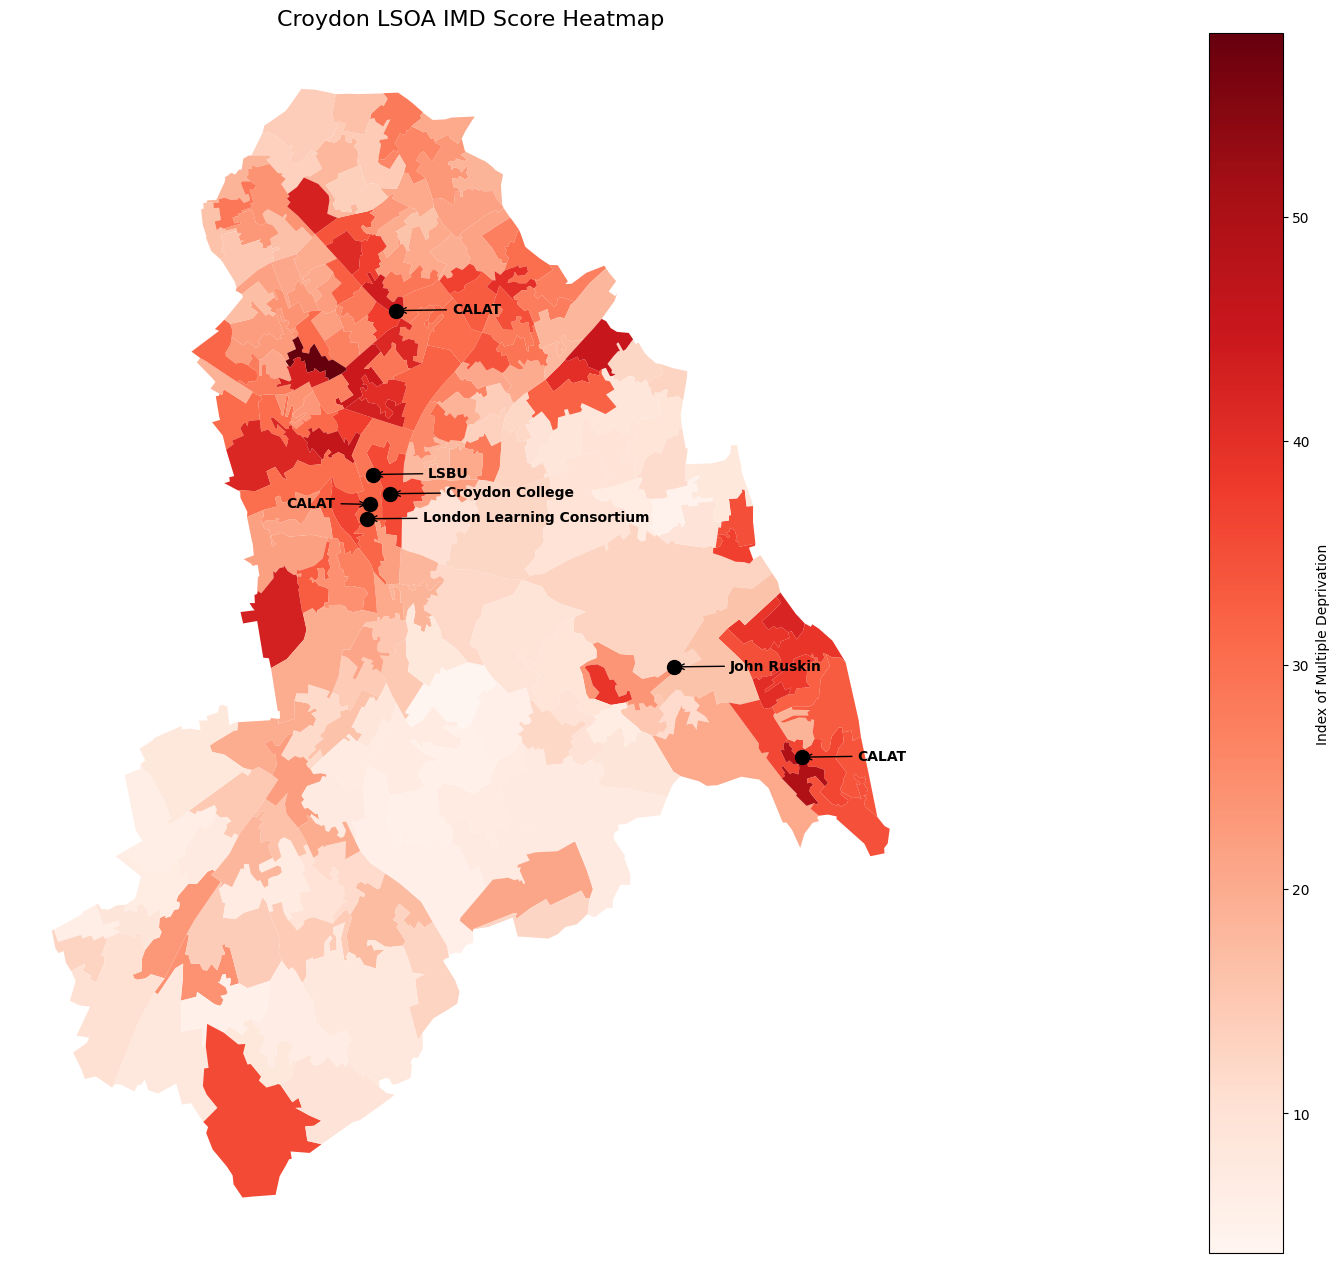

In [24]:
# IMD map - with postcodes

sheet_name = 'IoD2019 Scores'
boundaries_merge_key = 'LSOA11CD'
data_merge_key = 'LSOA code (2011)'
filter_column = 'Local Authority District name (2019)'
filter_value = 'Croydon'
plot_variable = 'Index of Multiple Deprivation (IMD) Score'
map_file_name = f'{img_directory}/imd_heatmap_with_postcodes.png'
plot_title = 'Croydon LSOA IMD Score Heatmap'

# postcodes_file_path = 'C:/Users/liam.thornton/Downloads/Adult Learning Facilities Postcodes.xlsx'
pc_sheet_name = 'Sheet1'
postcode_column = 'Postcode'


fig, ax, plot_dataset = plot_data(shape_file_path, 
                        data_file_path, 
                        sheet_name, 
                        boundaries_merge_key, 
                        data_merge_key, 
                        filter_column, 
                        filter_value, 
                        plot_variable, 
                        map_file_name,
                        plot_title)

geo_points.plot(column='geo_point',ax=ax, color='black', marker='o', markersize=100, legend=True)

for x, y, site_name, label in zip(geo_points['geo_point'].x, 
                                  geo_points['geo_point'].y, 
                                  geo_points['Site Name '],
                                  geo_points['Provider']):
    if site_name == 'Clocktower':
        ax.annotate(label, xy=(x,y), xytext=(-60,-2), textcoords='offset points', 
                    weight='bold', arrowprops=dict(arrowstyle="->", color='black')
)
    else:
        ax.annotate(label, xy=(x,y), xytext=(40,-2), textcoords='offset points', weight='bold',
                    fontsize=10, arrowprops=dict(arrowstyle="->", color='black'))
    
fig.savefig(map_file_name, dpi=fig.dpi, facecolor='white', transparent=False)

/Users/franciscomacedo/dev/sf/heatmaps/.venv/lib/python3.11/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


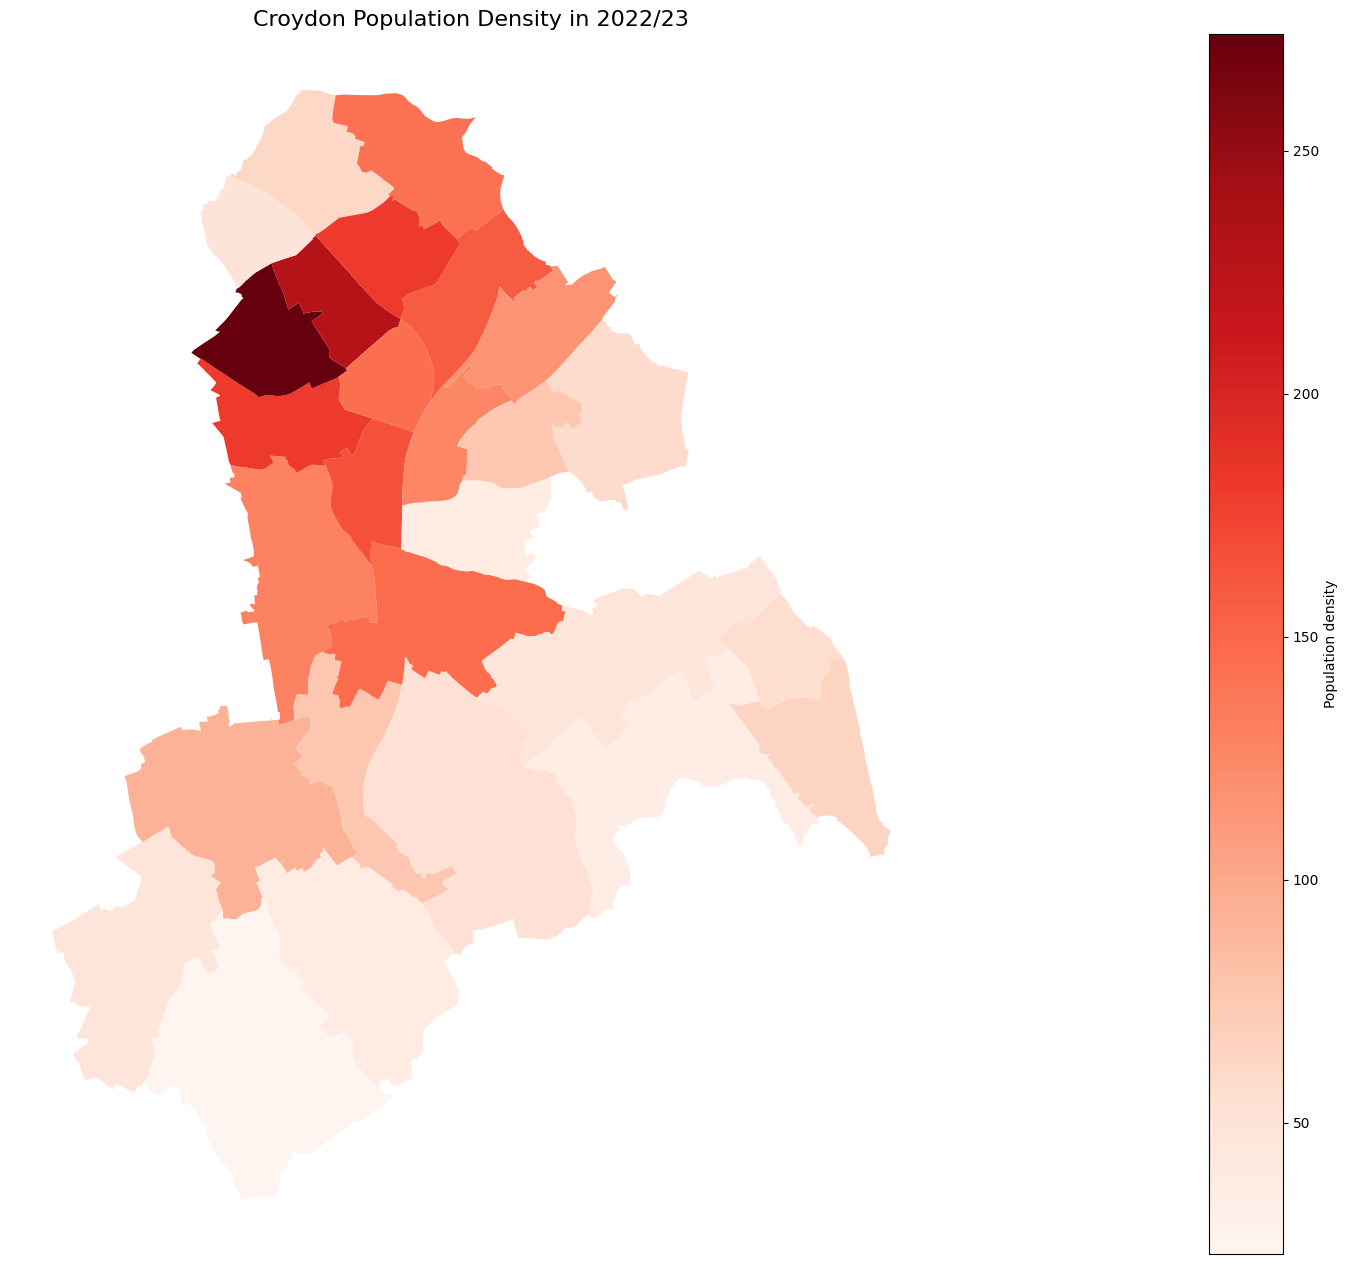

In [25]:
# WARD DENSITY MAP - no post codes

data_file_path = "pop_density.xlsx"
sheet_name = "Sheet1"
year = "2022/23"
boundaries_merge_key = 'NAME'
data_merge_key = 'Ward Name'
filter_column = 'Local Authority District name (2019)'
filter_value = 'Croydon'
plot_variable = 'Index of Multiple Deprivation (IMD) Score'
map_file_name = f"{img_directory}/pop_density_{year.replace('/', '_')}.png"
plot_title = f'Croydon Population Density in {year}'
shape_file_path = "London-wards-2018_ESRI/London_Ward.shp"
boundaries = read_shape_file(shape_file_path)
plot_dataset = boundaries.to_crs('EPSG:4326')
data = read_data_file(data_file_path, sheet_name)
merged_dataset = merge_datasets(boundaries, boundaries_merge_key, data, data_merge_key)
plot_dataset = filter_merged_data(merged_dataset, "DISTRICT", "Croydon")
plot_dataset.head()
fig = plt.figure(figsize=(20,20), dpi=100)
ax = fig.add_subplot(111)
ax.set_axis_off()
ax.set_facecolor("white")
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.0)


plot_dataset.plot(column=year, 
                    ax=ax, cax=cax, 
                    legend=True, 
                    legend_kwds={"label": "Population density"},
                    cmap='Reds')
ax.title.set_text(plot_title)
ax.title.set_size(16)

fig.savefig(map_file_name)

/Users/franciscomacedo/dev/sf/heatmaps/.venv/lib/python3.11/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):
/Users/franciscomacedo/dev/sf/heatmaps/.venv/lib/python3.11/site-packages/geopandas/plotting.py:658: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


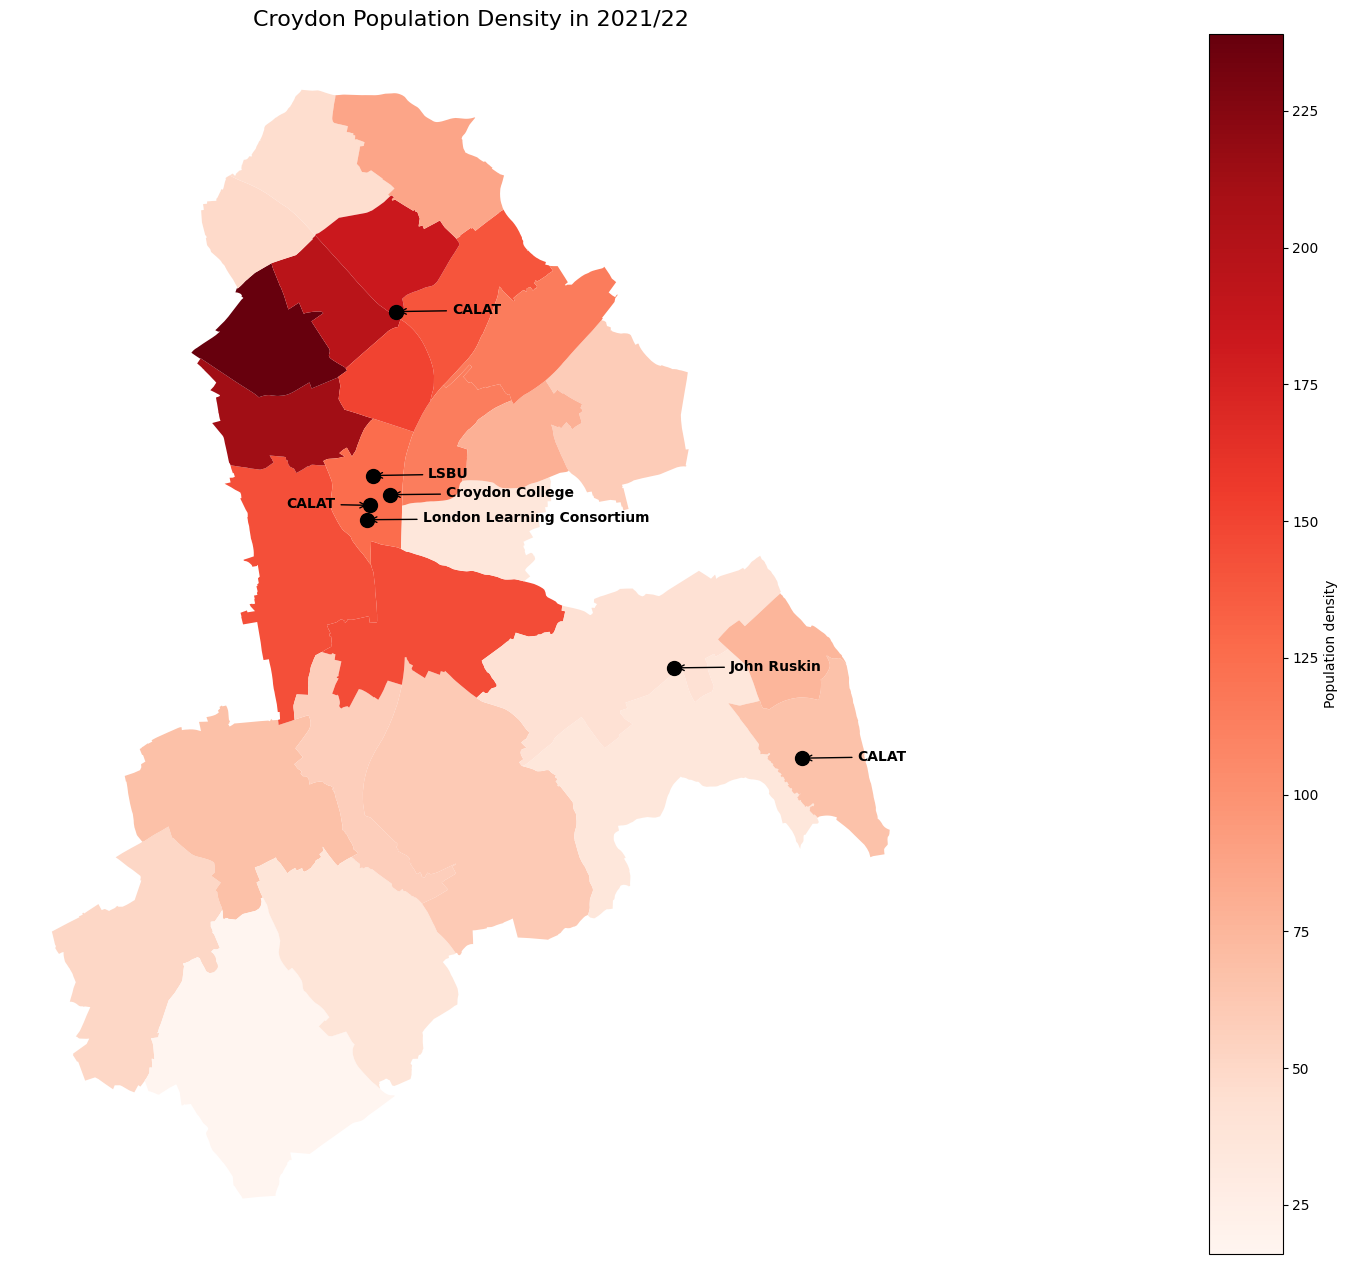

In [26]:
# WARD DENSITY MAP - with post codes

data_file_path = "pop_density.xlsx"
sheet_name = "Sheet1"
year = "2021/22"
boundaries_merge_key = 'NAME'
data_merge_key = 'Ward Name'
filter_column = 'Local Authority District name (2019)'
filter_value = 'Croydon'
plot_variable = 'Index of Multiple Deprivation (IMD) Score'
map_file_name = f"{img_directory}/pop_density_{year.replace('/', '_')}_with_postcodes.png"
plot_title = f'Croydon Population Density in {year}'
shape_file_path = "London-wards-2018_ESRI/London_Ward.shp"
boundaries = read_shape_file(shape_file_path)
plot_dataset = boundaries.to_crs('EPSG:4326')
data = read_data_file(data_file_path, sheet_name)
merged_dataset = merge_datasets(boundaries, boundaries_merge_key, data, data_merge_key)
plot_dataset = filter_merged_data(merged_dataset, "DISTRICT", "Croydon")
plot_dataset.head()
fig = plt.figure(figsize=(20,20), dpi=100)
ax = fig.add_subplot(111)
ax.set_axis_off()
ax.set_facecolor("white")
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.0)


plot_dataset.plot(column=year, 
                    ax=ax, cax=cax, 
                    legend=True, 
                    legend_kwds={"label": "Population density"},
                    cmap='Reds')
ax.title.set_text(plot_title)
ax.title.set_size(16)


geo_points = create_geo_points(postcodes, postcode_column)
geo_points.head()

geo_points.plot(column='geo_point',ax=ax, color='black', marker='o', markersize=100, legend=True)

for x, y, site_name, label in zip(geo_points['geo_point'].x, 
                                  geo_points['geo_point'].y, 
                                  geo_points['Site Name '],
                                  geo_points['Provider']):
    if site_name == 'Clocktower':
        ax.annotate(label, xy=(x,y), xytext=(-60,-2), textcoords='offset points', 
                    weight='bold', arrowprops=dict(arrowstyle="->", color='black')
)
    else:
        ax.annotate(label, xy=(x,y), xytext=(40,-2), textcoords='offset points', weight='bold',
                    fontsize=10, arrowprops=dict(arrowstyle="->", color='black'))
    
fig.savefig(map_file_name, dpi=fig.dpi, facecolor='white', transparent=False)